In [2]:
import pandas as pd
import numpy
import seaborn

In [3]:
d=pd.read_csv("bollywood.csv")

In [4]:
d

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,04-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,04-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,04-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [5]:
ct=d["SlNo"].count()

In [6]:
ct #number of records

149

In [7]:
#How many movies got released in each genre? Sort number of releases in each genre
#in descending order.
#Way 1
d["Genre"]=d["Genre"].str.strip()
genre=d.groupby("Genre")["SlNo"].count()

In [8]:
genre.sort_values(ascending = False)

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: SlNo, dtype: int64

In [9]:
#Way 2
num=d["Genre"].value_counts()

In [10]:
num

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [11]:
#Which genre had highest number of releases?
num.head(1)

Comedy    36
Name: Genre, dtype: int64

In [12]:
#How many movies in each genre got released in different release times like long
#weekend, festive season, etc.
pd.crosstab(d["Genre"],d["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [13]:
#Which month of the year, maximum number movie releases are seen? 
d["Release Date"]=pd.to_datetime(d["Release Date"])

In [14]:
d["Month"]=d["Release Date"].dt.month

In [15]:
highmon=d["Month"].value_counts()

In [16]:
highmon

1     20
3     19
5     18
7     16
2     16
4     11
11    10
9     10
6     10
10     9
8      8
12     2
Name: Month, dtype: int64

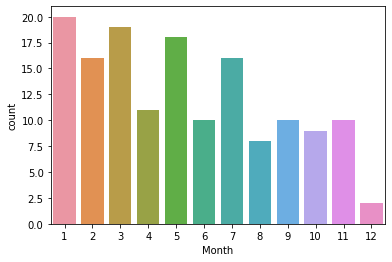

In [17]:
seaborn.countplot(x="Month",data=d)

In [18]:
highmon.head(1)

1    20
Name: Month, dtype: int64

In [19]:
#January has the highest

In [20]:
#Which month of the year typically sees most releases of high budgeted movies, that is,
#movies with budget of 25 crore or more?
highbudgetmon=d.loc[d["Budget"]>=25,"Month"].value_counts()

In [21]:
highbudgetmon.head(1)

2    9
Name: Month, dtype: int64

In [22]:
#February has the highest number of high budgets movies releses

In [23]:
#Which are the top 10 movies with maximum return on investment (ROI)? 
d["ROI"]=(d["BoxOfficeCollection"]-d["Budget"])/d["Budget"]

In [24]:
d

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2,1.000000
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,3,1.469231
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3,-0.625000
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3,1.378000


In [25]:
tenhighroi=d.sort_values(ascending=False,by="ROI").head(10)

In [26]:
tenhighroi["MovieName"]

64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object

In [27]:
#Do the movies have higher ROI if they get released on festive seasons or long
#weekend? 
d.groupby("ReleaseTime").sum()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
ReleaseTime,,,,,,,,
FS,1755,691,1522.10,80925565,243040,36679,125,16.555504
HS,1040,517,1343.15,56923627,114932,18249,102,15.315602
LW,1081,696,1474.83,59179479,155867,32783,83,16.908080
N,7299,2483,3954.34,300321396,659914,92254,483,65.114441


In [28]:
#Movies have higher ROI if they get released on long weekend

In [29]:
#Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
d["BoxOfficeCollection"].corr(d["YoutubeLikes"])

0.6825165877731297

In [30]:
#Moderate Positive correlation exists between box office collection and YouTube likes

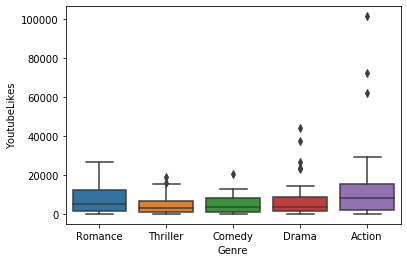

In [31]:
#Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.
seaborn.boxplot("Genre","YoutubeLikes",data=d)

In [32]:
#Action sees more YouTube likes than other genres

In [35]:
#Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, 
#YoutubeDislikes are highly correlated? 
d[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


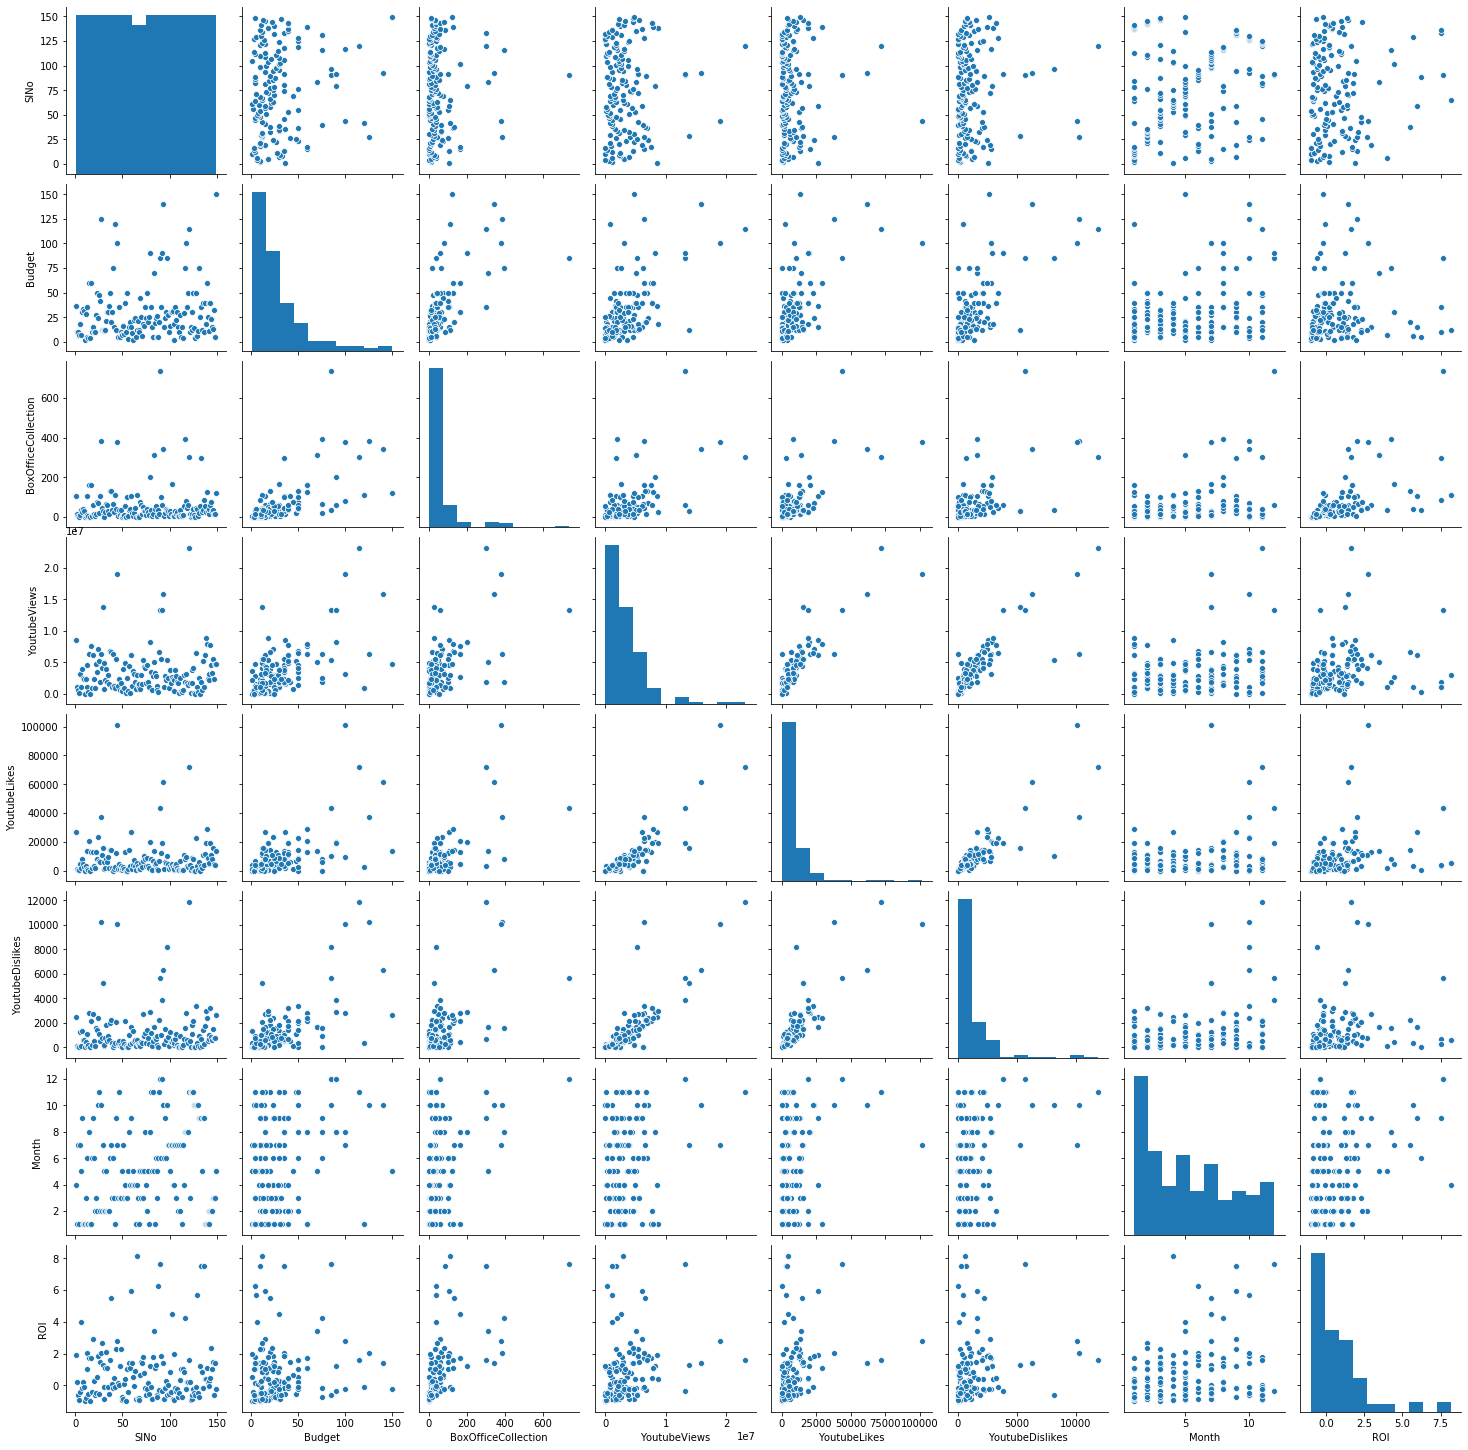

In [34]:
seaborn.pairplot(d,hue_order=["Budget", "BoxOfficeCollection", "YoutubeView", "YoutubeLikes", "YoutubeDislikes"],kind="scatter")

In [35]:
#YouTube views and YouTube likes have the strongest positive correlation

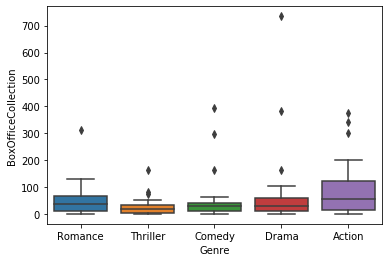

In [36]:
#During 2013−2015 period, highlight the genre of movies 
#and their box office collection? Visualize with best fit graph.
seaborn.boxplot("Genre","BoxOfficeCollection",data=d)

In [37]:
seaborn.catplot(x="Genre", y="vals", hue='cols', data=dfm, kind='point')

NameError: name 'dfm' is not defined

In [38]:
d.groupby("Genre").sum()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
Genre,,,,,,,,
Action,1782,1367,2200.34,136611593,401873,51807,112,7.246054
Comedy,2640,910,1660.14,91313029,172250,35867,211,28.382173
Drama,2597,847,2302.76,93525532,279077,36272,189,47.510940
Romance,1855,629,1321.03,86882563,177241,26293,147,25.080439
Thriller,2301,634,810.15,89017350,143312,29726,134,5.674021


In [39]:
#Drama had the higest total box office collection

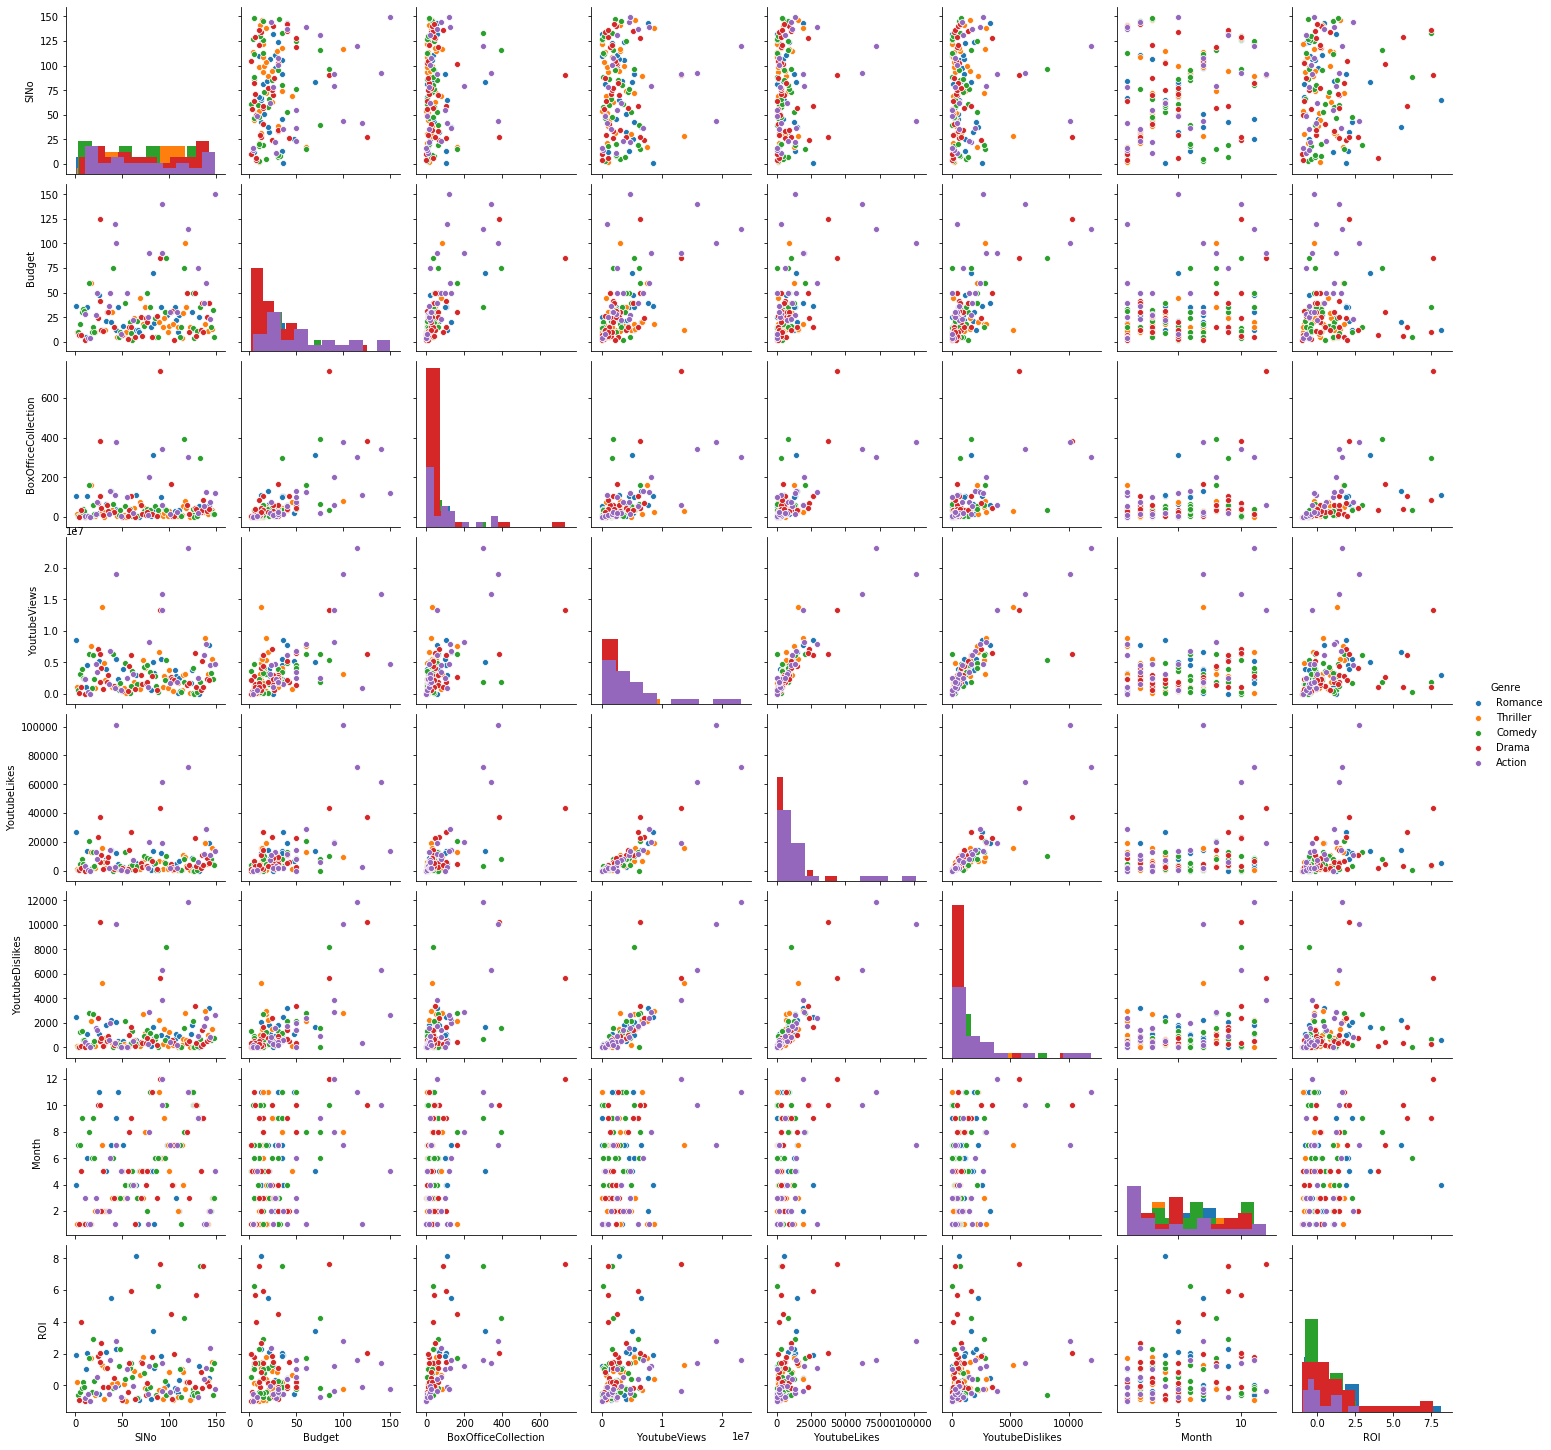

In [40]:
#Visualize the Budget and Box office collection based on Genre.
seaborn.pairplot(d, hue="Genre", diag_kind="hist")

In [41]:
d.groupby("Genre").sum()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
Genre,,,,,,,,
Action,1782,1367,2200.34,136611593,401873,51807,112,7.246054
Comedy,2640,910,1660.14,91313029,172250,35867,211,28.382173
Drama,2597,847,2302.76,93525532,279077,36272,189,47.510940
Romance,1855,629,1321.03,86882563,177241,26293,147,25.080439
Thriller,2301,634,810.15,89017350,143312,29726,134,5.674021


In [42]:
#Highest budget is of Action and highest Box Office Collection is of Drama

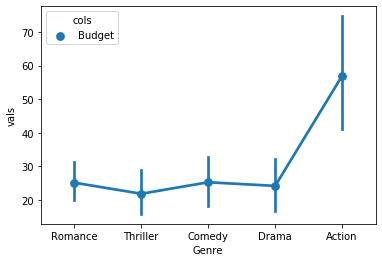

In [43]:
#Find the distribution of movie budget for every Genre.
dfm = d.melt('Genre','Budget', var_name='cols', value_name='vals')
seaborn.pointplot(x="Genre", y="vals", hue='cols', data=dfm)

In [44]:
#Action has the highet budget

In [54]:
#During 2013−2015, find the number of movies released in every year. Also, visualize
#with best fit graph.
pd.crosstab(d["Release Date"].dt.year,d["MovieName"].count())

col_0,149
Release Date,
2013,67
2014,70
2015,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd881114ad0>,
      dtype=object)

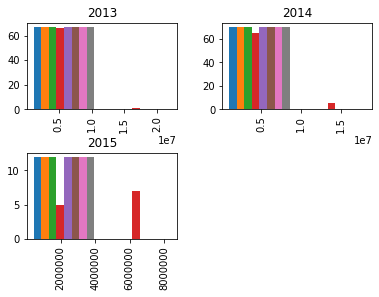

In [49]:
d.hist(by=d["Release Date"].dt.year,bins=2)

In [55]:
seaborn.histplot(x=d["Release Date"].dt.year)  #This command works, I dont know how to upgrade seaborn

AttributeError: module 'seaborn' has no attribute 'histplot'

In [56]:
#Most movies released in 2014